In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = np.sin(np.linspace(0,100,1000))
data = data.reshape(-1,1)

In [6]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [10]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [11]:
seq_length = 10
X,y = create_sequences(data_scaled,seq_length)

In [12]:
X_train,X_test = X[:800],X[800:]
y_train,y_test = y[:800],y[800:]

In [14]:
model  = Sequential([
    SimpleRNN(50,activation = 'relu',return_sequences = True,input_shape = (seq_length,1)),
    SimpleRNN(50, activation = 'relu'),
    Dense(1)
])

/home/franz/Documents/Lab/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer = Adam(learning_rate = 0.001),loss = 'mse')
model.fit(X_train,y_train,epochs = 20, batch_size = 16,validation_data = (X_test,y_test))

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1126 - val_loss: 2.1812e-04
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4653e-05 - val_loss: 7.0671e-06
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4327e-06 - val_loss: 3.9356e-06
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5139e-06 - val_loss: 1.1948e-06
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1751e-06 - val_loss: 9.1564e-07
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0571e-06 - val_loss: 3.8348e-07
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0673e-07 - val_loss: 3.0407e-07
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8347e-07 - val_loss: 2.9913e-07
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4626e-07 - val_loss: 2.6910e-07
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6409e-07 - val_loss: 2.6024e-07
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8084e-07 - val_loss: 

In [16]:
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


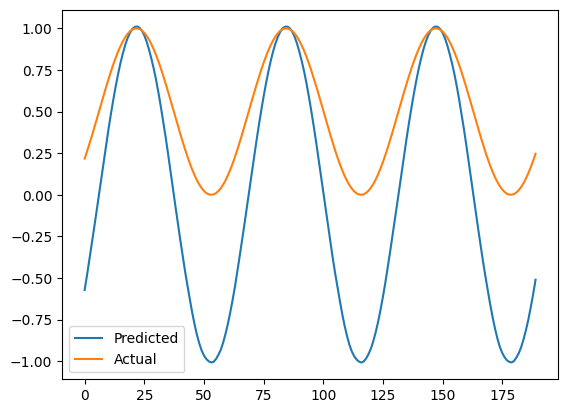

In [20]:
plt.plot(y_pred_inv,label = "Predicted")
plt.plot(y_test,label = "Actual")
plt.legend()
plt.show()